In [12]:
import pandas as pd

In [13]:
movies = pd.read_csv('D:\\IIITB\\Semester 2\\RS\\Mini-Project\\Dataset\\movies.dat', delimiter="::", header=None, encoding='latin-1')
ratings = pd.read_csv('D:\\IIITB\\Semester 2\\RS\\Mini-Project\\Dataset\\ratings.dat', delimiter='::', header=None)
users = pd.read_csv('D:\\IIITB\\Semester 2\\RS\\Mini-Project\\Dataset\\users.dat', delimiter="::", header=None)

C:\Users\Kalyani Verma\AppData\Local\Temp\ipykernel_20504\963364539.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('D:\\IIITB\\Semester 2\\RS\\Mini-Project\\Dataset\\movies.dat', delimiter="::", header=None, encoding='latin-1')
C:\Users\Kalyani Verma\AppData\Local\Temp\ipykernel_20504\963364539.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('D:\\IIITB\\Semester 2\\RS\\Mini-Project\\Dataset\\ratings.dat', delimiter='::', header=None)
C:\Users\Kalyani Verma\AppData\Local\Temp\ipykernel_20504\963364539.py:3: ParserWarning: Falling back to the 'python' en

In [16]:
movies = pd.DataFrame(movies)
ratings = pd.DataFrame(ratings)
users = pd.DataFrame(users)

In [17]:
movies.columns = ['movieId', 'title', 'genre']
ratings.columns = ['userId', 'movieId', 'rating', 'timestamp']
users.columns = ['userId', 'gender', 'age', 'occupation', 'zipcode']

In [18]:
movies.head()

,movieId,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


#### Removing year from movie's title

In [19]:
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)

In [20]:
#Removing the years from the 'title' column
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())

In [21]:
# ratings = pd.merge(movies, ratings).drop(['genre','timestamp'], axis=1)
ratings = pd.merge(movies, ratings).drop(['timestamp'], axis=1)
ratings = pd.merge(users, ratings).drop(['occupation', 'zipcode', 'gender'], axis=1)

In [22]:
ratings.head()

,userId,age,movieId,title,genre,year,rating
0,1,1,1,Toy Story (1995),Animation|Children's|Comedy,1995,5
1,1,1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1995,5
2,1,1,150,Apollo 13 (1995),Drama,1995,5
3,1,1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1977,4
4,1,1,527,Schindler's List (1993),Drama|War,1993,5


In [23]:
def take_year_into_account(row):

  children = "Children's"

  if (children in row['genre']):
    return max(0, row['rating'] + (1-row['age'])/(1+row['age']) + ((int(row['year']) - 2024)*5)/2024)

  else:
    return row['rating'] + ((int(row['year']) - 2024)*5)/2024

ratings['new_rating'] = ratings.apply(take_year_into_account, axis=1)

# print(ratings.shape)
ratings.head()

,userId,age,movieId,title,genre,year,rating,new_rating
0,1,1,1,Toy Story (1995),Animation|Children's|Comedy,1995,5,4.928360
1,1,1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1995,5,4.928360
2,1,1,150,Apollo 13 (1995),Drama,1995,5,4.928360
3,1,1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1977,4,3.883893
4,1,1,527,Schindler's List (1993),Drama|War,1993,5,4.923419


In [24]:
min(ratings['new_rating'])

0.0

## Novelty goes here

In [25]:
# ratings = pd.DataFrame(ratings)

In [26]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='new_rating')

userRatings.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
temp = userRatings

In [28]:
userRatings = temp

In [29]:
# userRatings = userRatings.dropna(thresh=10, axis=1)

# Calculate the mean of each row
row_means = userRatings.mean(axis=1, skipna=True)
userRatings = userRatings.sub(row_means, axis=0)
userRatings = userRatings.fillna(0)

userRatings
# print("After: ", userRatings.shape)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,-0.246672,0.0,0.0,0.0,0.0,-1.214557,-0.231508,0.0,0.000000,...,0.0,-0.249142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.214557
6037,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.265646,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6038,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [30]:
# userRatings_diff.head()

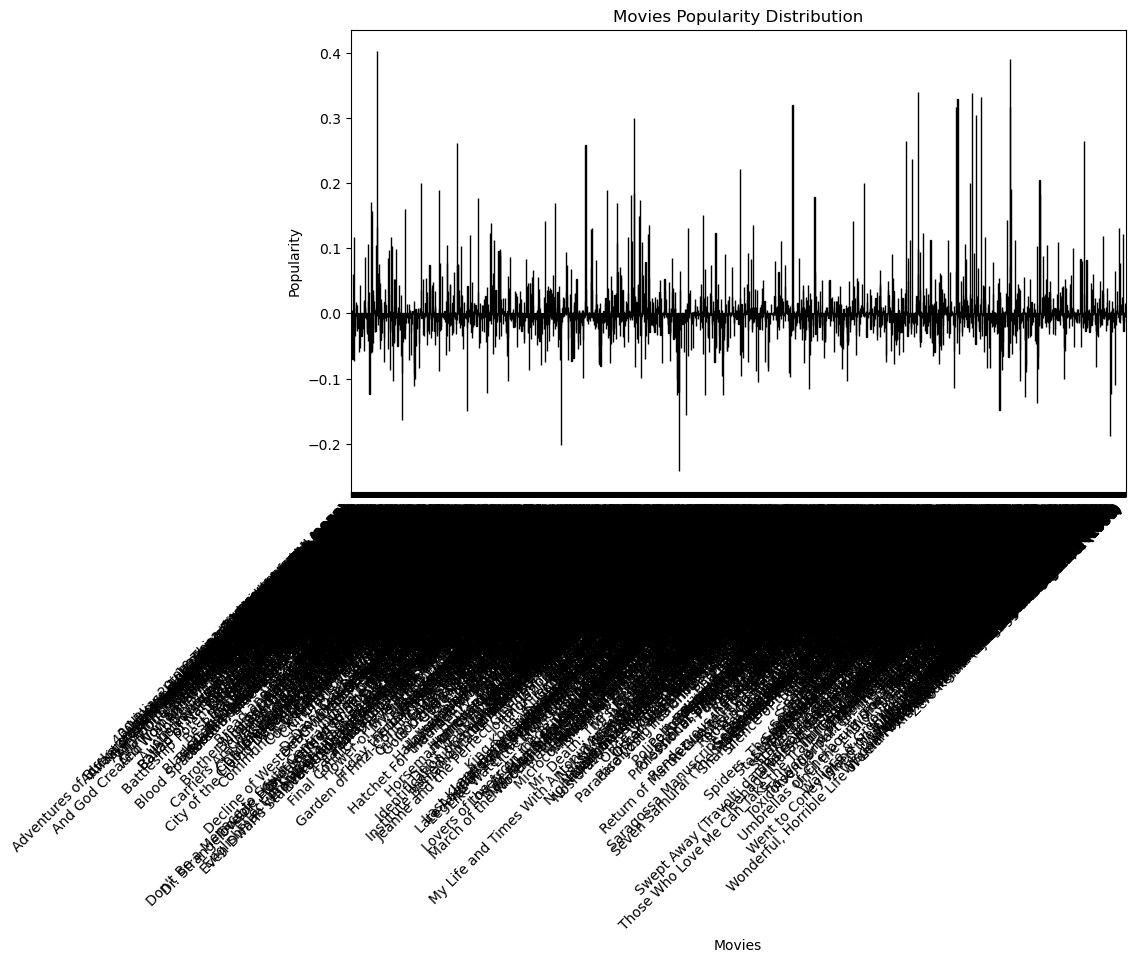

In [31]:
import matplotlib.pyplot as plt


userRatings = userRatings.drop_duplicates()

# Calculate item popularity (number of interactions per item)
item_popularity = userRatings.sum()/6040

# print(max(item_popularity))

# Plot the item popularity distribution
plt.figure(figsize=(10, 6))
item_popularity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Movies Popularity Distribution')
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()

### Applying Pearson Similarity between movies

In [32]:
import numpy as np

def pearson_correlation(X, Y):
    # Calculate the means of X and Y
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    # Calculate the numerator and denominators
    numerator = np.sum((X - mean_X) * (Y - mean_Y))
    denominator_X = np.sqrt(np.sum((X - mean_X)**2))
    denominator_Y = np.sqrt(np.sum((Y - mean_Y)**2))

    # Calculate the Pearson correlation coefficient
    correlation = numerator / (denominator_X * denominator_Y)

    return correlation


In [33]:
def calculate_correlation_matrix(userRatings):
    # Calculate the mean for each variable
    means = np.mean(userRatings, axis=0)

    # Center the data by subtracting the mean
    centered_data = userRatings - means

    # Calculate the covariance matrix manually
    # by taking product of centrered_matrx transpose and centered_matrix
    covariance_matrix = (centered_data.T @ centered_data)

    # Calculate the standard deviations for each variable
    # for this we take the diagonal of the covariance matrix and take the square root of the elements
    std_devs = np.sqrt(np.diag(covariance_matrix))

    # Next, take the outer product of the standard deviation array with itself
    # we then do elementwise division of the covariance_matrix with this normalisation factor
    temp = np.outer(std_devs,std_devs)
    pearson_matrix = covariance_matrix / temp

    return pd.DataFrame(pearson_matrix, columns=userRatings.columns, index=userRatings.columns)

# Calculate the Pearson correlation matrix
corrMatrix = calculate_correlation_matrix(userRatings)

In [34]:
# corrMatrix = pd.DataFrame(corrMatrix)
# corrMatrix.head()
# corrMatrix = movie_correlation

In [35]:
# corrMatrix = userRatings.corr(method='pearson')
# corrMatrix.head(100)

In [36]:
corrMatrix.shape

(3706, 3706)

In [37]:
def get_similar(movie_name, rating):
    # temp = corrMatrix[movie_name][movie_name]

    # corrMatrix[movie_name][movie_name] = 0
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    # corrMatrix[movie_name][movie_name] = temp

    return similar_ratings

In [39]:
input_movies = [
            # {'title':'Breakfast Club, The', 'rating':1},
            {'title':'Toy Story', 'rating':3},
            # {'title':'Jumanji', 'rating':5},
            # {'title':"Pulp Fiction", 'rating':4.5},
            {'title':'French Kiss', 'rating':1},
            {'title':'Three Colors: Red', 'rating':5}
         ]

recommendation_df = pd.DataFrame()

for input_movie in input_movies:
    movie = input_movie['title']
    rating = input_movie['rating']

    recommendation_df = pd.concat([recommendation_df, get_similar(movie, rating)], ignore_index=True)


recommendation_df.head(10)

KeyError: 'Toy Story'

## Recommeding Top Movies

In [ ]:
# recommendation_df.sum().sort_values(ascending=False).head(30)

## Building a metric to judge how good recommendation is

Idea is:

* Corresponding to a user input of watched movies and
ratings, find top movies recommendation.

* Now check of the recommendation, what all movies are already seen and actual rated of the movie.

* Prepare the metric to score the prediction


In [ ]:
userRatings.iloc[1]

In [ ]:
# from sklearn.metrics import mean_squared_error
import numpy as np
# import random

# Generate a random value of 0 or 1


# # some random index -> 4
userRatingIndex = 1
givenUserRating = userRatings.iloc[userRatingIndex]

input_movies = []

for column_name, value in givenUserRating.iteritems():
    if (int(value) != 0):
        input_movies.append({'title': column_name, 'rating': float(value)})


print(input_movies)


recommendation_df = pd.DataFrame()

# Get recommendation for only [thresholdSizeInputMovies] movies
# Use the rest of the movie for testing
sizeInputMovies = len(input_movies)
thresholdSizeInputMovies = sizeInputMovies*(0.7)

# input_movies_random = [input_movie in input_movies if ]

for input_movie in input_movies:
    # random_value = random.choice([0, 1])

    if (thresholdSizeInputMovies == 0):
        break
    # if (random_value):
    movie = input_movie['title']
    rating = input_movie['rating']

    recommendation_df = recommendation_df.append(get_similar(movie, rating), ignore_index=True)
    thresholdSizeInputMovies = thresholdSizeInputMovies - 1


recommendation_df.head(10)


recommendation_df_sum = recommendation_df.mean(axis=0)

In [ ]:
recommendation_df

In [ ]:
recommendation_df_normalised = ((recommendation_df_sum - min(recommendation_df_sum))*5)/(max(recommendation_df_sum)-min(recommendation_df_sum))

In [ ]:
type(recommendation_df_normalised)

### Find the difference between the actual and predicted

In [ ]:
# Out of the recommended movie, go to each and check if user already watched it and rated it good

min_score = min(recommendation_df_normalised)
max_score = max(recommendation_df_normalised)

thres = (min_score + max_score)/2.0

recommendation_df_normalised = pd.DataFrame(recommendation_df_normalised)
recommendation_df_normalised = recommendation_df_normalised.applymap(lambda x: 1 if x >= thres else -1)
givenUserRating = pd.DataFrame(givenUserRating)
givenUserRating = givenUserRating.applymap(lambda x: 1 if x >= 3 else (0 if x == 0 else -1))

In [ ]:
givenUserRating.shape

In [ ]:
recommendation_df_normalised.head()

In [ ]:
# givenUserRating[5][0]

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0

givenUserRatingDict = {}
index = 0

for movie_name, value in givenUserRating.iterrows():
    givenUserRatingDict[movie_name] = givenUserRating[userRatingIndex+1][index]
    index = index+1



index = 0
for movie_name, value in recommendation_df_normalised.iterrows():
    val2 = recommendation_df_normalised[0][index] # 0 is the name of value column
    index = index+1
    if movie_name in givenUserRatingDict:
        val = givenUserRatingDict[movie_name]
    else:
        continue

  # print(val)
    if val == 1 and val2 == 1:
        tp = tp+1
    elif val == 1 and val2 == -1:
        fn = fn+1
    elif val == -1 and val2 == 1:
        fp = fp+1
    elif val == -1 and val2 == -1:
        tn = tn+1


accuracy = (tp+tn)/(tp+tn+fp+fn)
# precision = tp/(tp+fp)
# recall = tp/(tp+fn)
# f1score = 2*precision*recall/(precision + recall)
print(accuracy)
